In [37]:
# data transformation
# image:Pillow, OpenCV
# audio:scipy, librosa
# text:raw python, NLTK, SpaCy

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
trainset=torchvision.datasets.CIFAR10(root='./data',train=True,download=False,transform=transform)
#trainloader:每张图都是3×32×32，4张图一组（batch_size=4），每组都是一个列表，第一个元素是4张图的像素值，第二个元素是4张图的类别。共12500组，50000张图
trainloader=torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True,num_workers=2)
testset=torchvision.datasets.CIFAR10(root='./data',train=False,download=False,transform=transform)
#testloader:每张图都是3×32×32，4张图一组（batch_size=4），每组都是一个列表，第一个元素是4张图的像素值，第二个元素是4张图的类别。共5000组，20000张图
testloader=torch.utils.data.DataLoader(testset,batch_size=4,shuffle=False,num_workers=2)
classes=('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [9]:
dataiter=iter(trainloader)
inputs,labels=dataiter.next()
print(inputs.shape,labels.shape)

torch.Size([4, 3, 32, 32]) torch.Size([4])


In [65]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img=img/2+0.5
    npimg=img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
dataiter=iter(trainloader)
images,labels=dataiter.next()
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

 bird   cat horse horse


In [70]:
print(images[0].size())

torch.Size([3, 32, 32])


(1000, 1000)
3000000 (1000, 1000, 3)
(32, 32)
3072 (32, 32, 3)
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ..., 
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..., 
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..., 
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ..., 
 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..., 
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..., 
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..., 
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
torch.Size([3, 32, 32])

(0 ,.,.) = 
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  1.0000
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  1.0000
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  1.0000
           ...             ⋱             ...          
  1.0000  1.0000  1.0000  ...   1.000

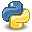

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

img=Image.open('img.jpg')
print(img.size)
imgArray=np.array(img)
print(imgArray.size,imgArray.shape)
img=img.resize((32,32))
print(img.size)
imgArray=np.array(img)
print(imgArray.size,imgArray.shape)
print(imgArray)

import torchvision.transforms as transforms
transform=transforms.Compose([transforms.ToTensor(),])
# imgTensor=transform(img)
imgTensor=transform(imgArray)
print(imgTensor.size())
print(imgTensor)
image=transforms.Compose([transforms.ToPILImage(),])(imgTensor)
image

In [107]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img=img/2+0.5
    npimg=img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
dataiter=iter(trainloader)
images,labels=dataiter.next()
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

truck   cat  ship  frog


In [5]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

In [6]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1=nn.Conv2d(3,6,5)
        self.pool=nn.MaxPool2d(2,2)
        self.conv2=nn.Conv2d(6,16,5)
        self.fc1=nn.Linear(16*5*5,120)
        self.fc2=nn.Linear(120,84)
        self.fc3=nn.Linear(84,10)
        
    def forward(self,x):
        x=self.pool(F.relu(self.conv1(x)))
        x=self.pool(F.relu(self.conv2(x)))
        x=x.view(-1,16*5*5)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return x
net=Net()

In [7]:
import torch.optim as optim
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(net.parameters(),lr=0.001,momentum=0.9)

In [15]:
i=0
for item in trainloader:
    inputs,labels=item
    print(inputs.size())
    print(labels.size())
    print(type(inputs))
    print(type(labels))
    if i==0:
        break

torch.Size([4, 3, 32, 32])
torch.Size([4])
<class 'torch.FloatTensor'>
<class 'torch.LongTensor'>


In [8]:
for epoch in range(2):
    
    running_loss=0.0
    for i,data in enumerate(trainloader,0):
        inputs,labels=data
        inputs,labels=Variable(inputs),Variable(labels)
        
        optimizer.zero_grad()
        outputs=net(inputs)
        loss=criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        
        running_loss+=loss.data[0]
        if i%2000==1999:
            print('[%d,%5d] loss: %.3f'%(epoch+1,i+1,running_loss/2000))
            running_loss=0.0
        
print('Finished Training')

[1, 2000] loss: 2.198
[1, 4000] loss: 1.896
[1, 6000] loss: 1.695
[1, 8000] loss: 1.586
[1,10000] loss: 1.534
[1,12000] loss: 1.482
[2, 2000] loss: 1.399
[2, 4000] loss: 1.393
[2, 6000] loss: 1.338
[2, 8000] loss: 1.344
[2,10000] loss: 1.309
[2,12000] loss: 1.278
Finished Training


In [10]:
dataiter=iter(testloader)
images,labels=dataiter.next()
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ',' ',' '.join('%5s'%classes[labels[j]] for j in range(4)))

GroundTruth:      cat  ship  ship plane


In [13]:
outputs=net(Variable(images))
_,predicted=torch.max(outputs.data,1)
print('Predicted: ',' ',' '.join('%5s'%classes[predicted[j]] for j in range(4)))

Predicted:      cat  ship truck  ship


In [14]:
correct=0
total=0
for data in testloader:
    images,labels=data
    outputs=net(Variable(images))
    _,predicted=torch.max(outputs.data,1)
    total+=labels.size(0)
    correct+=(predicted==labels).sum()
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 52 %


In [17]:
class_correct=list(0. for i in range(10))
class_total=list(0. for i in range(10))
for data in testloader:
    images,labels=data
    outputs=net(Variable(images))
    _,predicted=torch.max(outputs.data,1)
    c=(predicted==labels).squeeze()
    for i in range(4):
        label=labels[i]
        class_correct[label]+=c[i]
        class_total[label]+=1
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 53 %
Accuracy of   car : 44 %
Accuracy of  bird : 42 %
Accuracy of   cat : 46 %
Accuracy of  deer : 39 %
Accuracy of   dog : 42 %
Accuracy of  frog : 56 %
Accuracy of horse : 49 %
Accuracy of  ship : 64 %
Accuracy of truck : 84 %
